# Project 1 - kNN


## Exploratory Data Analysis



##### Dataset reference: https://www.kaggle.com/CooperUnion/anime-recommendations-database?fbclid=IwAR3sXr48_xQHp8NgF9AyXuVf0RGwTkFw8bfkRoXda6zix9rQsevpya8JDOM#rating.csv


### Context
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.


### Content

#### Anime.csv

**anime_id** - myanimelist.net's unique id identifying an anime.

**name** - full name of anime.

**genre** - comma separated list of genres for this anime.

**type** - movie, TV, OVA, etc.

**episodes** - how many episodes in this show. (1 if movie).

**rating** - average rating out of 10 for this anime.

**members** - number of community members that are in this anime's "group".

#### Rating.csv

**user_id** - non identifiable randomly generated user id.

**anime_id** - the anime that this user has rated.

**rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).



## Step 1 - Importing the DataFrame (CSV to DataFrame)

### Libraries

In [1073]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.tools as tls
#tls.embed('https://plot.ly/~cufflinks/8')
%matplotlib inline
#import cufflinks as cf
#print(cf.__version)

### Datasets


In [1074]:
df = pd.read_csv('../data/anime.csv')
#test = pd.read_csv('../data/rating.csv')

### Checking the structure of the colums
#### Visualizing the number of colums and features' names associated to the dataset

In [1075]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [1076]:
print("Dimensions of DataFrame: {}".format(df.shape))

Dimensions of DataFrame: (12294, 7)


In [1077]:
#test.columns

In [1078]:
#print("Dimensions of test: {}".format(test.shape))

#### Obtaining a sample of the associated data 

In [1079]:
df.sample(5)

,anime_id,name,genre,type,episodes,rating,members
9731,9243,Nine 2: Koibito Sengen,"Action, School, Sports",Special,1,6.55,151
5992,13143,Baku Tech! Bakugan,"Action, Game, Shounen",TV,51,6.28,1752
5329,3932,Magnerobo Ga-Keen,"Action, Mecha, Sci-Fi",TV,39,6.49,416
4753,17705,DD Hokuto no Ken (2013),"Parody, Seinen",TV,13,6.64,1805
10801,32916,YanYan Machiko Specials,"Comedy, Music, Slice of Life",Special,Unknown,3.75,36


#### It is appreciated the nature of the columns (Categorical and Numerical)

### Descriptive statistics summary of the variable of the dataset features 

In [1080]:
print(df.dtypes)

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


### Number of total values per feature 

In [1081]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


### Number of unique values per feature

In [1082]:
df.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

### Exploring the missing values

type       25
genre      62
rating    230
dtype: int64

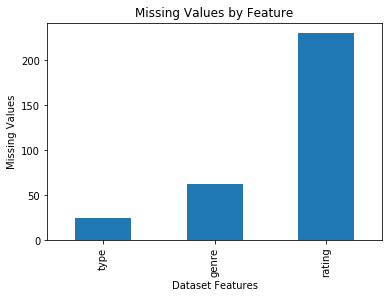

In [1083]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar().set_title("Missing Values by Feature")
missing.plot.bar().set_xlabel('Dataset Features')
missing.plot.bar().set_ylabel('Missing Values')
missing.head()

#### The category with most missing values is found in 'rating' followed by 'gender' and 'type' respectively.

In [1084]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [1085]:
df['anime_id'].describe()

count    12294.000000
mean     14058.221653
std      11455.294701
min          1.000000
25%       3484.250000
50%      10260.500000
75%      24794.500000
max      34527.000000
Name: anime_id, dtype: float64

In [1086]:
df['name'].describe()

count                       12294
unique                      12292
top       Shi Wan Ge Leng Xiaohua
freq                            2
Name: name, dtype: object

In [1087]:
df['genre'].describe()

count      12232
unique      3264
top       Hentai
freq         823
Name: genre, dtype: object

In [1088]:
df['type'].describe()

count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

In [1089]:
df['episodes'].describe()

count     12294
unique      187
top           1
freq       5677
Name: episodes, dtype: object

In [1090]:
df['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [1091]:
df['members'].describe()

count    1.229400e+04
mean     1.807134e+04
std      5.482068e+04
min      5.000000e+00
25%      2.250000e+02
50%      1.550000e+03
75%      9.437000e+03
max      1.013917e+06
Name: members, dtype: float64

# Box plot

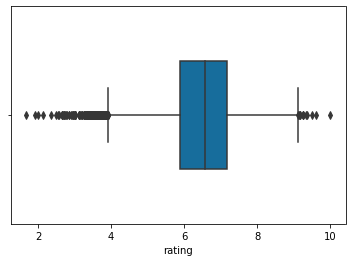

In [1092]:
bplot = sns.boxplot(x='rating', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")


### Dropping the rows with missing data ('na')

In [1093]:
df = df.dropna()

In [1094]:
df['rating'].describe()

count    12017.000000
mean         6.478264
std          1.023857
min          1.670000
25%          5.890000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

#### Histogram

In [1095]:
df['rating'].describe()

count    12017.000000
mean         6.478264
std          1.023857
min          1.670000
25%          5.890000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [1096]:
df['rating'].unique()

array([ 9.37,  9.26,  9.25,  9.17,  9.16,  9.15,  9.13,  9.11,  9.1 ,
        9.06,  9.05,  9.04,  8.98,  8.93,  8.92,  8.88,  8.84,  8.83,
        8.82,  8.81,  8.8 ,  8.78,  8.77,  8.76,  8.75,  8.74,  8.73,
        8.72,  8.71,  8.69,  8.68,  8.67,  8.66,  8.65,  8.64,  8.62,
        8.61,  8.6 ,  8.59,  8.58,  8.57,  8.56,  8.55,  8.54,  8.53,
        8.52,  8.51,  8.5 ,  8.49,  8.48,  8.47,  8.46,  8.45,  8.44,
        8.43,  8.42,  8.41,  8.4 ,  8.39,  8.38,  8.37,  8.36,  8.35,
        8.34,  8.33,  8.32,  8.31,  8.3 ,  8.29,  8.28,  8.27,  8.26,
        8.25,  8.24,  8.23,  8.22,  8.21,  8.2 ,  8.19,  8.18,  8.17,
        8.16,  8.15,  8.14,  8.13,  8.12,  8.11,  8.1 ,  8.09,  8.08,
        8.07,  8.06,  8.05,  8.04,  8.03,  8.02,  8.01,  8.  ,  7.99,
        7.98,  7.97,  7.96,  7.95,  7.94,  7.93,  7.92,  7.91,  7.9 ,
        7.89,  7.88,  7.87,  7.86,  7.85,  7.84,  7.83,  7.82,  7.81,
        7.8 ,  7.79,  7.78,  7.77,  7.76,  7.75,  7.74,  7.73,  7.72,
        7.71,  7.7 ,

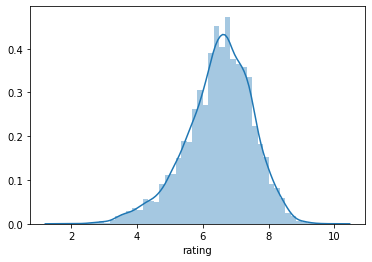

In [1097]:
sns.distplot(df['rating']);

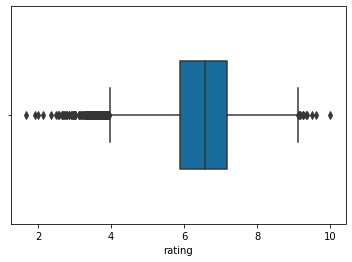

In [1098]:
bplot = sns.boxplot(x='rating', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [1099]:
df['members'].describe()

count    1.201700e+04
mean     1.834888e+04
std      5.537250e+04
min      1.200000e+01
25%      2.250000e+02
50%      1.552000e+03
75%      9.588000e+03
max      1.013917e+06
Name: members, dtype: float64

In [1100]:
df['members'].unique()

array([200630, 793665, 114262, ...,  27411,  57355,    652])

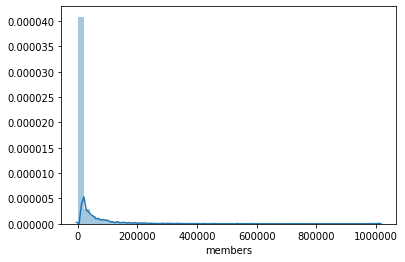

In [1101]:
sns.distplot(df['members']);

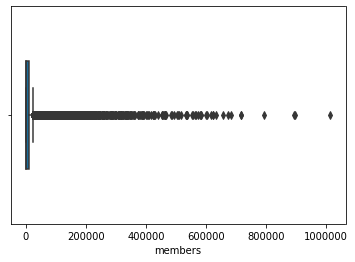

In [1102]:
bplot = sns.boxplot(x='members', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [1103]:
df['episodes'].describe()

count     12017
unique      187
top           1
freq       5571
Name: episodes, dtype: object

In [1104]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [1105]:
df = df[df['episodes']!='Unknown']

In [1106]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       '39', '101', '47', '50', '62', '33', '112', '23', '3', '94', '6',
       '8', '14', '7', '40', '15', '203', '77', '291', '120', '102', '96',
       '38', '79', '175', '103', '70', '153', '45', '5', '21', '63', '52',
       '28', '145', '36', '69', '60', '178', '114', '35', '61', '34',
       '109', '20', '9', '49', '366', '97', '48', '78', '358', '155',
       '104', '113', '54', '167', '161', '42', '142', '31', '373', '220',
       '46', '195', '17', '1787', '73', '147', '127', '16', '19', '98',
       '150', '76', '53', '124', '29', '115', '224', '44', '58', '93',
       '154', '92', '67', '172', '86', '30', '276', '59', '72', '330',
       '41', '105', '128', '137', '56', '55', '65', '243', '193', '18',
       '191', '180', '91', '192', '66', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87', '170

Convert From object (Categorical) to Int
https://stackoverflow.com/questions/48094854/python-convert-object-to-float

In [1107]:
df['episodes'] = df.episodes.astype(int)

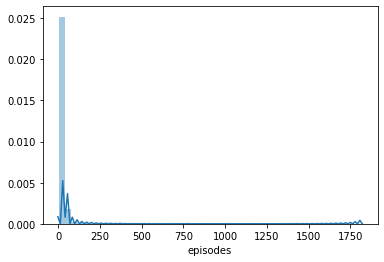

In [1108]:
sns.distplot(df['episodes']);

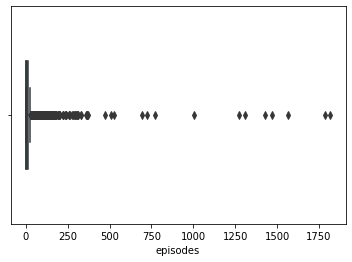

In [1109]:
bplot = sns.boxplot(x='episodes', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [1110]:
print("Skewness Episodes: %f" % df['episodes'].skew())

Skewness Episodes: 23.277143


In [1111]:
print("Skewness Rating: %f" % df['rating'].skew())

Skewness Rating: -0.538142


In [1112]:
print("Skewness Members: %f" % df['members'].skew())

Skewness Members: 6.588423


Negative values for the skewness indicate data that are skewed left. By skewed left, we mean that the left tail is long relative to the right tail. 
However, because the value is relatively close to zero, the distribution is almost symetrical ( < 0.5).

In [1113]:
print("Kurtosis Episodes: %f" % df['episodes'].kurt())

Kurtosis Episodes: 726.254496


In [1114]:
print("Kurtosis Rating: %f" % df['rating'].kurt())

Kurtosis Rating: 0.505835


In [1115]:
print("Kurtosis Members: %f" % df['members'].kurt())

Kurtosis Members: 61.400628


Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center.
It means the effect of the tails on the distribution contribution. ()

In [1116]:
print("Dimensions of DataFrame: {}".format(df.shape))

Dimensions of DataFrame: (11830, 7)


In [1117]:
#ndf = df.drop(columns=['anime_id','name','genre','type'])
#ndf = ndf.pivot("episodes","rating","members")
#ax = sns.heatmap(ndf)

#flights = sns.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights)

In [1118]:
#Outliers
#We will use Z-score function defined in scipy library to detect the outliers.
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
from scipy import stats
import numpy as np
df = df.drop(columns=['anime_id','name','genre','type'])
z = np.abs(stats.zscore(df))
print(z)

[[ 0.24390475  2.83130101  3.28918118]
 [ 1.09381288  2.7233631  13.99975827]
 [ 0.81777591  2.71355056  1.72932194]
 ...
 [ 0.18020391  1.57452817  0.33036483]
 [ 0.24390475  1.4764028   0.3311595 ]
 [ 0.24390475  1.00540102  0.3317555 ]]


In [1119]:
df = df[(z < 3).all(axis=1)]
df.head()

,episodes,rating,members
2,51,9.25,114262
4,51,9.16,151266
5,10,9.15,93351
7,110,9.11,80679
8,1,9.10,72534


In [1120]:
print("Dimensions of DataFrame: {}".format(df.shape))


Dimensions of DataFrame: (11446, 3)


Scatter plots - Relationships between the numerical varibles.

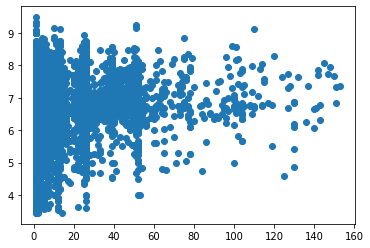

In [1121]:
plt.scatter( df['episodes'], df['rating'], marker='o');

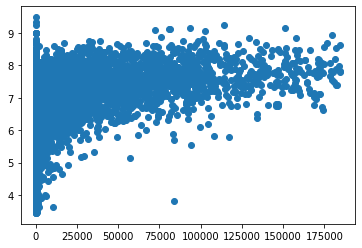

In [1122]:
plt.scatter(df['members'], df['rating'],marker='o');

In [1123]:
#ndf = df.pivot("episodes", "members","rating")
#ax = sns.heatmap(ndf,annot=True)


# Separate a column into its values Features: genre , type


# Hot Encoding


# get_dummies

In [1124]:
#### https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [1125]:
### Split up the dataset into inputs (X) and target (y)

#### Drop the Categorical features as well as the class label (rating)

In [1126]:
# Add a new column rating class 
df['Class']=1 #df['rating']
df.sample(5)

,episodes,rating,members,Class
3320,52,7.02,22429,1
2979,65,7.11,10591,1
3075,12,7.09,29401,1
3863,52,6.86,531,1
6116,1,6.25,3037,1


In [1127]:
# 1: High
# or 0: Low based on rating
df.loc[df['rating'] >= df['rating'].mean(), 'Class'] = 1
df.loc[df['rating'] < df['rating'].mean(), 'Class'] = 0

In [1128]:
df.sample(5)

,episodes,rating,members,Class
6290,1,6.18,1906,0
4893,25,6.60,199,1
593,24,7.95,43545,1
8892,1,4.22,29,0
3982,1,6.83,9773,1


In [1129]:
print(df.dtypes)

episodes      int64
rating      float64
members       int64
Class         int64
dtype: object


In [1130]:
#X = df.drop(columns=['anime_id','name','genre','type','rating','Class'])
X = df.drop(columns=['rating','Class'])

In [1131]:
X.head()

,episodes,members
2,51,114262
4,51,151266
5,10,93351
7,110,80679
8,1,72534


In [1132]:
#Normalization
#from sklearn import preprocessing

#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pandas.DataFrame(x_scaled)

#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
#X=(X-X.mean())/X.std()
X=(X-X.min())/(X.max()-X.min())
X.head()

,episodes,members
2,0.328947,0.619187
4,0.328947,0.819742
5,0.059211,0.505853
7,0.717105,0.437173
8,0.000000,0.393029


In [1133]:
# Separate the target values
y = df['Class']

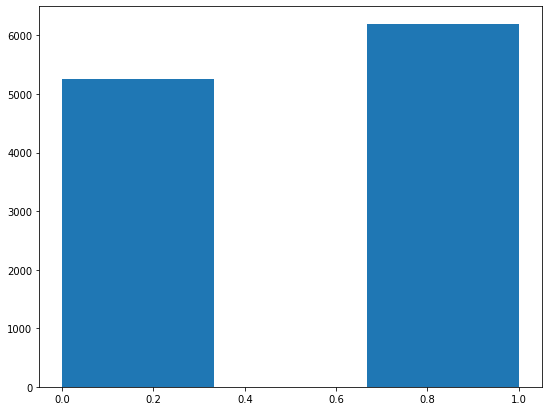

In [1134]:
df['Class'].hist(bins=3,figsize=(9,7),grid=False)

In [1135]:
# view target values
y.sample(5)

9187     0
10664    0
9866     1
8718     0
53       1
Name: Class, dtype: int64

In [1136]:
y.describe()

count    11446.000000
mean         0.540538
std          0.498376
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Class, dtype: float64

Split the dataset into train and test data

In [1137]:
from sklearn.model_selection import train_test_split

In [1138]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Building and training the model

In [1139]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier

In [1140]:
knn = KNeighborsClassifier(n_neighbors = 3)# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Testing the model

In [1141]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 1, 0, 0, 1])

In [1142]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7410480349344978

k-Fold Cross-Validation

In [1143]:
from sklearn.model_selection import cross_val_score
import numpy as np#create a new KNN model

In [1144]:
knn_cv = KNeighborsClassifier(n_neighbors=3)#train model with cv of 5 

In [1145]:
cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72358079 0.77816594 0.76059415 0.6286588  0.52272727]
cv_scores mean:0.6827453893008159


Hypertuning model parameters using GridSearchCV

In [1146]:
from sklearn.model_selection import GridSearchCV

In [1147]:
#create new a knn model
knn2 = KNeighborsClassifier()

In [1148]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}

In [1149]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [1150]:
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1151]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 30}

In [1152]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_


0.7349292329197973

Confusion Matrix

In [1153]:
#https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,769,283,1052
1,310,928,1238
All,1079,1211,2290


Classification report

In [1154]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1052
           1       0.77      0.75      0.76      1238

    accuracy                           0.74      2290
   macro avg       0.74      0.74      0.74      2290
weighted avg       0.74      0.74      0.74      2290



ROC (Receiver Operating Characteristic) curve

https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn


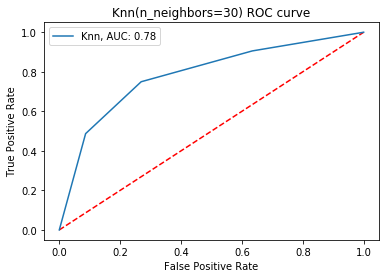

In [1155]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr, label='Knn, AUC: 0.78')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=30) ROC curve')
plt.show()

In [1156]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7846643365663987

In [1157]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,40)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

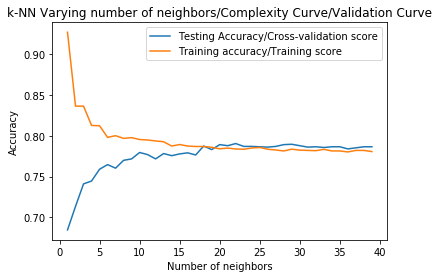

In [1158]:
#Generate plot
plt.title('k-NN Varying number of neighbors/Complexity Curve/Validation Curve')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy/Cross-validation score')
plt.plot(neighbors, train_accuracy, label='Training accuracy/Training score')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Learning Curve

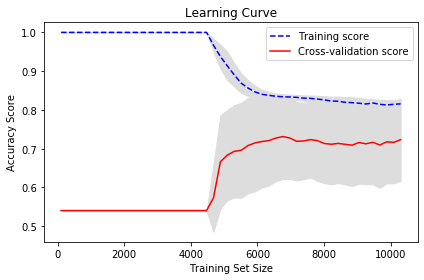

In [1159]:
#https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
# Create CV training and test scores for various training set sizes
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()